<a href="https://colab.research.google.com/github/porfinogeneta/Fastai-Book/blob/main/Lesson1_Pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !git clone https://github.com/fastai/course-v4 'drive/My Drive/course-v4'

In [4]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Mounted at /content/gdrive


In [5]:
from fastbook import *

In [ ]:
# note: the "> ../dev/null" above just prevents the cell
# from outputting all the install verbosity ;)

# Import the vision library

In [6]:
from fastai.vision.all import *  #Note: replace the ____ here

# Find the Dogs vs Cats DataSet
In Fastai, the URLs variable contains urls towards various datasets.
We'll take advantage of notebooks' capabilities here.

In the following cell, type "URL." and wait for a second.

You should see different options appearing (starting with "ADULT_SAMPLE" and "AG_NEWS"...)

<br />

<b> IMPORTANT NOTE: if you are using a regular Jupyter Notebook instead of Colab, do "URL." and press tab to see the options appearing ;) </b>

'http://files.fast.ai/data/examples/dogscats.tgz'

Click [here](https://course.fast.ai/datasets) to learn what those links contain, and complete the url variable below:

In [7]:
url_pointing_towards_dogsvcats = URLs.DOGS # Note: replace the ____
assert url_pointing_towards_dogsvcats.split('/')[-1] == 'dogscats.tgz'

# Download the data and find where it was downloaded

Now we will use the "untar_data" function to download the images.

But first, let's learn what it does exactly. Again, we'll take advantage of the notebook's capabilities.
Type ?untar_data() below and run the cell.

In [11]:
help(untar_data) # Get the documentation for untar_data()

Help on function untar_data in module fastai.data.external:

untar_data(url: 'str', archive: 'Path' = None, data: 'Path' = None, c_key: 'str' = 'data', force_download: 'bool' = False, base: 'str' = '~/.fastai') -> 'Path'
    Download `url` using `FastDownload.get`



In [ ]:
# note; you can also try ??untar_data or help(untar_data) and see what they do differently

So, the doc says :

"Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`."

In Jeremy's class example, he provides the url, but neither fname nor dest.

So what happens ? Let's find out...

In [ ]:
# if you have problems with the cell below,
# here is a linux command to remove broken file
# just un-comment the following line:
# rm -r -f /root/.fastai/archive/dogscats.tgz

In [8]:
# pass the url you defined above to untar_data:

path = untar_data(url_pointing_towards_dogsvcats)  # Replace the ____
assert path.name == 'dogscats'

In [13]:
print(path)

/root/.fastai/data/dogscats


As you can see, since we didn't give any fname or dest to the untar_data function, it chose its own default and store your data in a private directory called .fastai/data

In [14]:
# This is interesting !
type(path)

pathlib.PosixPath

As you can see, "path" is not just a string storing the directory where you data was downloaded. It is a PosixPath.

PosixPathes have a bunch of fun methods. For example, try this:

In [15]:
path.ls()

(#4) [Path('/root/.fastai/data/dogscats/valid'),Path('/root/.fastai/data/dogscats/train'),Path('/root/.fastai/data/dogscats/test1'),Path('/root/.fastai/data/dogscats/sample')]

So, this url provides us with four folders:

- test1
- train
- valid
- sample

This is interesting ! The course example created the dataloaders by taking advantage of the fact that the cats images started with an Uppercase letter.

This won't always be the case ! What should we do ? Rename all our pictures so that one class starts with uppercase and the other doesn't ??

Well, the example we have here has another approach, they store different categories in different folders. Let's see:

In [16]:
(path/'train').ls()  # Yes, you can add a folder to a PosixPath like so ;)
# in the "train" folder, there are two other folders: dogs, and cats.
# Luckily for us, fastai provides us with an api that deals
# With this kind of data splitting

(#2) [Path('/root/.fastai/data/dogscats/train/dogs'),Path('/root/.fastai/data/dogscats/train/cats')]

# Create DataLoaders using folders
(not the file's name)

In [14]:
# Again, use the notebooks capabilities to find what you need;
# start by typing "ImageDataLoaders." and wait until you get a list of options
# can you guess which one you could use ? ;-)
ImageDataLoaders.from_folder(path)

In [15]:
# replace this with the method you found above
# if you didn't find it (or need a hint), I put as many "_" as there are
# letters in the method you are looking for
dls = ImageDataLoaders.from_folder(path,
                                   item_tfms=Resize(224))

# Don't worry about the Resize() for now, we'll see what this does latter
assert isinstance(dls, DataLoaders)

Congratulations !!!!

You created your first dataloaders. Those are cool things where fastai does a lot for you !

For example, try the following:


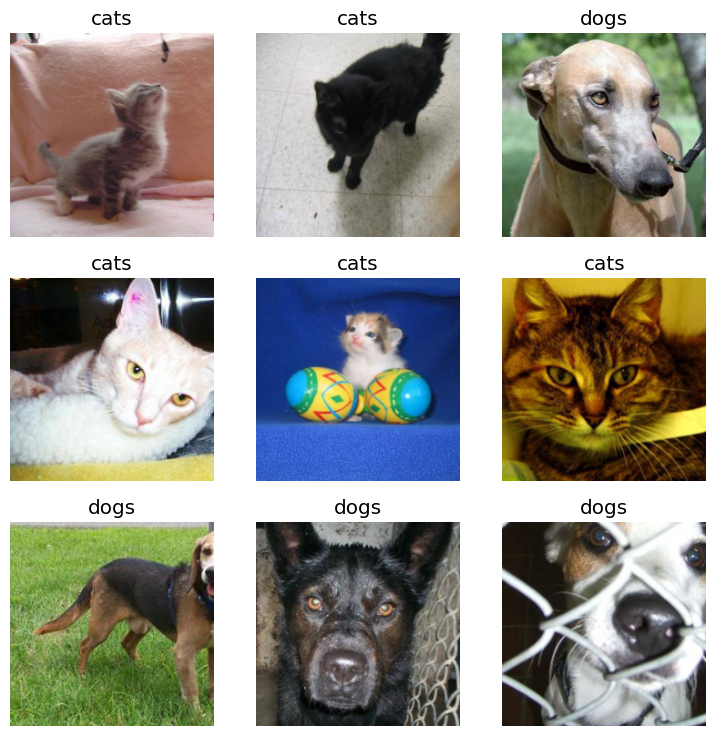

In [20]:
dls.show_batch()  # Un-comment the cell. Cool, heh ?

# Use our dataloaders to train a deep learning model !
The only lines from the course we haven't covered are the following ones:

In [16]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 178MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.082568,0.041835,0.014500,02:15


epoch,train_loss,valid_loss,error_rate,time
0,0.031951,0.019829,0.007500,02:31


Can you guess what you need to change in our case ?
That's right, <b>absolutely nothing !!</b>
You'll find that most of the time, pipeline-ing your data into dataloaders is
the hardest part (at least that's the way I see it). Once this is done, it's a
matter of creating your learner, and train it.



In [17]:
# You'll learn more about learners and training in the future.
# For now, just type the first line of code of the cell above here:
# (yes, type it! Don't copy paste. You are here to practice ;) )
learn = vision_learner(dls, resnet34, metrics=error_rate)
assert isinstance(learn, Learner)

In [18]:
# Now, type the second line above and train your model:
learn.fine_tune(1) # one epoch

epoch,train_loss,valid_loss,error_rate,time
0,0.095624,0.039433,0.010000,02:12


epoch,train_loss,valid_loss,error_rate,time
0,0.044007,0.022373,0.009000,02:30


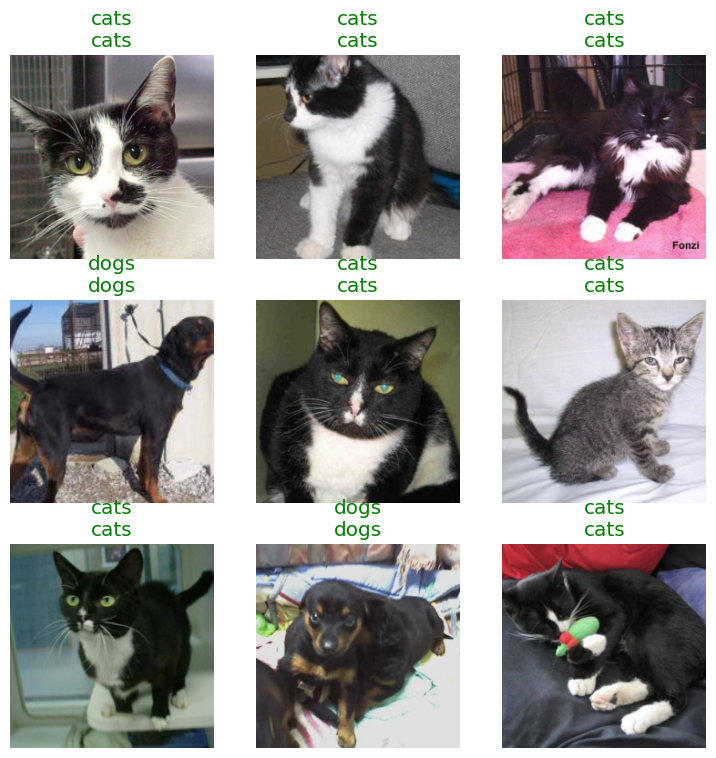

In [54]:
# Now, you should start gaining the habit of using "object." in a colab cell
# and waiting to see your options.

# If you do that with your "learn" object ('learn.' and wait..), you should find
# a method to show the results of the model. Try it !

learn.show_results()

# if you didn't find it, hint: learn.____________()

In [26]:
# test for some dog picture

uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Label: dogs.
Category: 1
Probability it's a cat: 0.950441


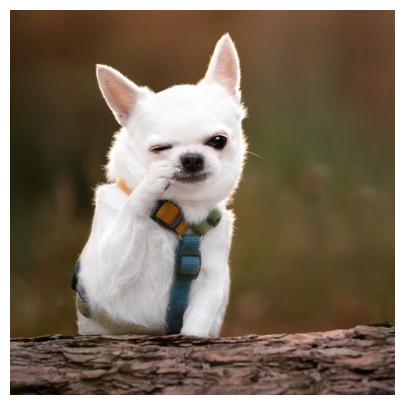

In [28]:
img = PILImage.create(uploader.data[0])

img.show()

label,category,probs = learn.predict(img)
print(f"Label: {label}.")
print(f"Category: {category}")
print(f"Probability it's a cat: {probs[1].item():.6f}")

# Recap

you just trained a model that differentiates between cats and dogs. Can you do it again with less help ?

## Find the url:

In [41]:
url_dvsc_type = URLs.DOGS

## Untar it:

In [42]:
path = untar_data(url_dvsc_type)

In [43]:
path.ls()

(#4) [Path('/root/.fastai/data/dogscats/valid'),Path('/root/.fastai/data/dogscats/train'),Path('/root/.fastai/data/dogscats/test1'),Path('/root/.fastai/data/dogscats/sample')]

In [44]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/dogscats/train/dogs'),Path('/root/.fastai/data/dogscats/train/cats')]

##Create dataloaders:

In [50]:
dls = ImageDataLoaders.from_folder(path, item_tfms=Resize(244), valid_pct=0.2, seed=42)

## Create the Model

In [51]:
learner = vision_learner(dls, resnet34, metrics=accuracy)

## Train the model

In [55]:
learner.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.694585,0.676166,0.652985,03:28


epoch,train_loss,valid_loss,accuracy,time
0,0.675999,0.662424,0.659915,03:55


## See results !

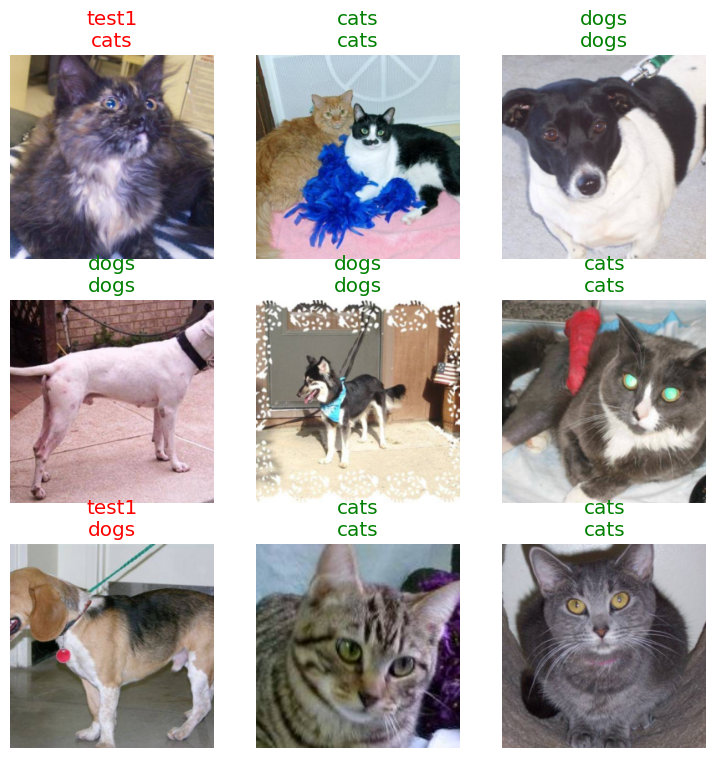

In [56]:
learner.show_results()

Now, wouldn't you like to put that model online to impress your family and friends ? We'll that's coming with next week's lesson. Stay tuned ;)